In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=10000)
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fires = pd.read_csv('fire_features_with_derived.csv')

#split date into year/month/day feature
date = fires['Current Day'].values
years = [int(date[i][0:4]) for i in range(len(date))]
months = [int(date[i][5:7]) for i in range(len(date))]
days = [int(date[i][8:10]) for i in range(len(date))]
fires['years'] = years
fires['months'] = months
fires['days'] = days

#get rid of rows which contain nans/zeros for features
inds_features = np.where(fires['biomass_12Z']==0)


fires = fires.drop(labels=inds_features[0], axis=0)
fires

,Incident Number,Fire Name,Current Day,Lat Fire,Lon Fire,Number of VIIRS points,TLML_12Z,QLML_12Z,SPEEDLML_12Z,PS_12Z,...,biomass_12Z,ESATLML_12Z,ELML_12Z,HDWLML,Td_12Z_700mb,E_700mb,HAINES,years,months,days
0,10662684.0,PAINTED WAGON,2019-04-08,33.786944,-112.753333,3.0,290.748108,0.004608,10.770707,91644.742188,...,7.627477e-10,20.131931,2.638775,188.413662,-66.278872,0.008245,5.0,2019,4,8
13,10663171.0,LONE MOUNTAIN,2019-06-21,33.808056,-105.738611,9.0,291.568451,0.003356,7.488189,80981.914062,...,9.687870e-10,21.198124,1.695978,146.035756,-64.593229,0.010364,5.0,2019,6,21
23,10663171.0,LONE MOUNTAIN,2019-07-01,33.808056,-105.738611,0.0,291.934814,0.010633,4.458162,81414.648438,...,6.619176e-10,21.690044,5.442483,72.434264,-57.266238,0.026697,6.0,2019,7,1
24,10663171.0,LONE MOUNTAIN,2019-07-02,33.808056,-105.738611,9.0,290.191132,0.010948,4.315524,81379.093750,...,3.611985e-10,19.435098,5.602998,59.692758,-54.788338,0.036158,5.0,2019,7,2
28,10664535.0,Roaring,2019-06-07,33.893500,-108.996000,27.0,287.163910,0.004974,3.406101,77239.523438,...,3.626358e-09,16.005112,2.401526,46.335181,-58.488769,0.022917,5.0,2019,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,11976592.0,AIRPORT,2020-12-03,33.895278,-117.598056,52.0,281.269012,0.001763,11.389023,94925.812500,...,2.524405e-08,10.817664,1.042559,111.328892,-80.702418,0.000959,5.0,2020,12,3
8078,11978031.0,LESLIE GULCH,2020-11-06,43.330020,-117.222300,44.0,284.868561,0.004524,6.578714,87044.875000,...,1.040069e-09,13.770914,2.460382,74.408757,-60.880654,0.016899,5.0,2020,11,6
8081,11979081.0,LAURA 2,2020-11-17,40.034034,-120.115073,48.0,280.841309,0.002591,6.511267,83903.031250,...,2.897377e-08,10.506919,1.355881,59.584851,-68.852754,0.005765,5.0,2020,11,17
8091,11980186.0,SANDERSON,2020-12-13,33.889444,-117.070833,11.0,279.254852,0.001604,6.979411,90997.539062,...,1.553367e-09,9.421946,0.909643,59.410857,-67.541377,0.006927,5.0,2020,12,13


## Split the data into features and labels

In [17]:
feat_names = ['Lat Fire', 'Lon Fire','Number of VIIRS points', 'TLML_12Z','QLML_12Z','SPEEDLML_12Z', 'PS_12Z','T_12Z_700mb','T_12Z_500mb','QV_12Z_700mb','ESATLML_12Z','ELML_12Z','HDWLML','Td_12Z_700mb','E_700mb','HAINES','years','months','days']
features = fires[['Lat Fire', 'Lon Fire','Number of VIIRS points', 'TLML_12Z','QLML_12Z','SPEEDLML_12Z', 'PS_12Z','T_12Z_700mb','T_12Z_500mb','QV_12Z_700mb','ESATLML_12Z','ELML_12Z','HDWLML','Td_12Z_700mb','E_700mb','HAINES','years','months','days']]
labels = np.log10(fires[['biomass_12Z']].values)
#print(labels)

#look at the correlation between the features
correlations = np.corrcoef(features, rowvar=False)
inds = np.where(np.abs(correlations)>=0.3)
print('Moderately correlated variable pairs are: ')

for ii in range(len(inds[0])):
    print(feat_names[inds[0][ii]], feat_names[inds[1][ii]])

# do the train test split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3)


Moderately correlated variable pairs are: 
Lat Fire Lat Fire
Lat Fire TLML_12Z
Lat Fire T_12Z_700mb
Lat Fire T_12Z_500mb
Lat Fire ESATLML_12Z
Lat Fire HDWLML
Lon Fire Lon Fire
Lon Fire PS_12Z
Lon Fire QV_12Z_700mb
Lon Fire Td_12Z_700mb
Lon Fire E_700mb
Number of VIIRS points Number of VIIRS points
TLML_12Z Lat Fire
TLML_12Z TLML_12Z
TLML_12Z QLML_12Z
TLML_12Z PS_12Z
TLML_12Z T_12Z_700mb
TLML_12Z T_12Z_500mb
TLML_12Z QV_12Z_700mb
TLML_12Z ESATLML_12Z
TLML_12Z ELML_12Z
TLML_12Z HDWLML
TLML_12Z Td_12Z_700mb
TLML_12Z E_700mb
TLML_12Z HAINES
TLML_12Z months
QLML_12Z TLML_12Z
QLML_12Z QLML_12Z
QLML_12Z QV_12Z_700mb
QLML_12Z ELML_12Z
QLML_12Z Td_12Z_700mb
QLML_12Z E_700mb
QLML_12Z months
SPEEDLML_12Z SPEEDLML_12Z
SPEEDLML_12Z HDWLML
PS_12Z Lon Fire
PS_12Z TLML_12Z
PS_12Z PS_12Z
PS_12Z ESATLML_12Z
PS_12Z ELML_12Z
T_12Z_700mb Lat Fire
T_12Z_700mb TLML_12Z
T_12Z_700mb T_12Z_700mb
T_12Z_700mb T_12Z_500mb
T_12Z_700mb QV_12Z_700mb
T_12Z_700mb ESATLML_12Z
T_12Z_700mb HDWLML
T_12Z_700mb Td_12Z_700mb


## Do a cute lil linear regression

https://machinelearningmastery.com/calculate-feature-importance-with-python/ is feature im

0.001259107576676029
(1392, 1) (1392, 1)
[[1.        0.1091638]
 [0.1091638 1.       ]]
(1037,)
[[1.         0.10654489]
 [0.10654489 1.        ]]


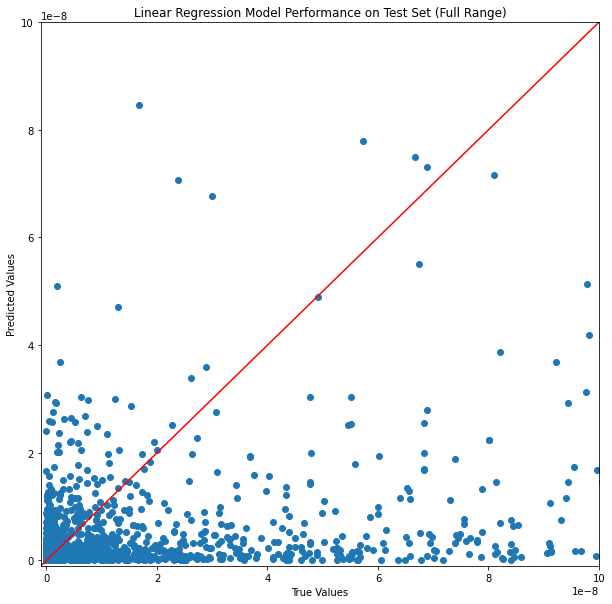

[ 7.27350189e-02 -7.89856274e-03  4.21837394e-04  3.39563766e-03
 -5.30224209e+02  7.93080586e-02  1.27577965e-05  5.07276530e-02
  1.14939898e-01  3.75365155e+04  4.57816784e-02  7.20114169e-01
 -5.32946130e-03 -2.01833683e-02 -8.55252180e+03 -2.54967849e-01
  2.36871417e-01 -2.54175870e-01  2.16249225e-03]
19 19
Variable  Lat Fire has coefficient: 0.0727350188866382
Variable  Lon Fire has coefficient: -0.007898562738696688
Variable  Number of VIIRS points has coefficient: 0.0004218373942878924
Variable  TLML_12Z has coefficient: 0.0033956376550470404
Variable  QLML_12Z has coefficient: -530.2242086714639
Variable  SPEEDLML_12Z has coefficient: 0.0793080585582817
Variable  PS_12Z has coefficient: 1.2757796544473782e-05
Variable  T_12Z_700mb has coefficient: 0.050727652963918506
Variable  T_12Z_500mb has coefficient: 0.11493989822383177
Variable  QV_12Z_700mb has coefficient: 37536.51554059253
Variable  ESATLML_12Z has coefficient: 0.04578167843109742
Variable  ELML_12Z has coefficient

In [23]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
compare = [[y_test[i][0], y_pred[i][0]] for i in range(len(y_test))]
#print(compare)
rmse = np.sqrt(np.mean(((10**y_pred)-(10**y_test))**2))
print(rmse)
print(y_test.shape, y_pred.shape)
print(np.corrcoef(10**y_pred[:,0], 10**y_test[:,0]))
y_pred_sub = y_pred[y_test>=-9]
y_test_sub = y_test[y_test>=-9]
print(y_pred_sub.shape)
print(np.corrcoef(10**y_pred_sub, 10**y_test_sub))

low = -1e-9
high = 1e-7
plt.figure(figsize=(10,10))
plt.scatter(10**y_test, 10**y_pred)
plt.plot(np.linspace(low, high),np.linspace(low,high), c='r')
plt.title('Linear Regression Model Performance on Test Set (Full Range)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([low, high])
plt.ylim([low, high])

plt.show()

importance = reg.coef_[0]
print(importance)
predictors = ['Lat Fire', 'Lon Fire','Number of VIIRS points', 'TLML_12Z','QLML_12Z','SPEEDLML_12Z', 'PS_12Z','T_12Z_700mb','T_12Z_500mb','QV_12Z_700mb','ESATLML_12Z','ELML_12Z','HDWLML','Td_12Z_700mb','E_700mb','HAINES','years','months','days']
print(len(predictors), len(importance))
for ii in range(len(predictors)):
    print('Variable ', predictors[ii], 'has coefficient:', importance[ii])

## Support Vector Machine

In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance


In [29]:
features = fires[['Lat Fire', 'Lon Fire','Number of VIIRS points', 'TLML_12Z','QLML_12Z','SPEEDLML_12Z', 'PS_12Z','T_12Z_700mb','T_12Z_500mb','QV_12Z_700mb','ESATLML_12Z','ELML_12Z','HDWLML','Td_12Z_700mb','E_700mb','HAINES','years','months','days']]
labels = np.log10(fires[['biomass_12Z']].values)
print(labels)

# do the train test split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3)

[[ -9.11761909]
 [ -9.01377171]
 [ -9.17919608]
 [ -9.44225401]
 [ -8.4405293 ]
 [ -7.25842931]
 [ -9.00799732]
 [ -9.32446327]
 [ -7.68541636]
 [ -8.23540664]
 [ -8.64257969]
 [ -9.15496383]
 [ -9.59590327]
 [-10.62265502]
 [-11.88546212]
 [ -8.66103133]
 [ -8.21998308]
 [ -8.1109407 ]
 [ -7.94835234]
 [ -9.07236211]
 [-12.29040124]
 [ -9.62953699]
 [ -9.08754269]
 [-10.77531285]
 [ -8.92508883]
 [ -6.86120328]
 [ -8.8929286 ]
 [-11.36638742]
 [ -9.20167249]
 [ -8.21814903]
 [ -9.07500181]
 [ -8.77068431]
 [ -7.96691124]
 [-10.90108446]
 [-13.46021018]
 [ -7.28947688]
 [ -7.9262695 ]
 [ -8.04748072]
 [ -6.93842165]
 [ -7.40672444]
 [ -6.79344392]
 [ -7.06002894]
 [ -8.8122233 ]
 [ -6.88968035]
 [ -8.89662493]
 [ -8.95164927]
 [ -7.61228436]
 [ -7.69862985]
 [ -8.61446358]
 [ -7.39862149]
 [ -7.11923816]
 [ -8.10918773]
 [ -7.18723155]
 [ -7.94510223]
 [ -9.23728237]
 [ -7.97397244]
 [ -7.29878796]
 [ -8.48637446]
 [ -6.91043484]
 [ -9.28809379]
 [ -7.60003834]
 [ -8.45735215]
 [ -9.76

In [30]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) #scaling is necessary!

#regr =SVR(C=1.0, epsilon=0.2)

regr.fit(x_train, np.ravel(y_train))

y_pred = regr.predict(x_test)
#print(y_pred)
#print(y_pred)
#compare = [[y_test[i][0], y_pred[i][0]] for i in range(len(y_test))]
#print(compare)
rmse = np.sqrt(np.mean(((10**y_pred)-(10**y_test))**2))
print(rmse)
print(np.corrcoef(10**y_pred, 10**y_test[:,0]))
y_pred_sub = y_pred[y_test>=-9]
y_test_sub = y_test[y_test>=-9]
print(y_pred_sub.shape)
print(np.corrcoef(10**y_pred_sub, 10**y_test_sub))

low = -1e-9
high = 1e-7
plt.figure(figsize=(10,10))
plt.scatter(10**y_test, 10**y_pred)
plt.plot(np.linspace(low, high),np.linspace(low,high), c='r')
plt.title('Support Vector Regression Model Performance on Test Set (Full Range)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([low, high])
plt.ylim([low, high])

plt.show()

#plot a regression error characteristic


# feature importances
#results = permutation_importance(regr, x_train, y_train, scoring='neg_mean_squared_error')
"""importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()"""

5.98991386235709e-08
[[1.         0.49640857]
 [0.49640857 1.        ]]


IndexError: too many indices for array

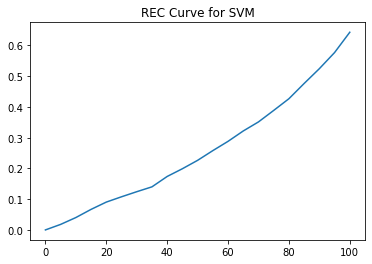

In [12]:
def REC(y_pred, y_test):
    percent_error = np.abs((y_pred-y_test)/y_test)*100
    thresholds = np.linspace(0,100, 21) #5% increments
    acc = np.zeros(thresholds.shape)
    for ii in range(len(thresholds)):
        n_correct = len(percent_error[percent_error<=thresholds[ii]])
        acc[ii] = n_correct/len(y_test)
    return thresholds, acc

# plot REC curve
thresholds, accuracy = REC(10**y_pred, 10**y_test[:,0])

plt.plot(thresholds, accuracy)
plt.title('REC Curve for SVM')
plt.show()

2.5394980019026727
(1392,) (1392,)
[[1.         0.45667337]
 [0.45667337 1.        ]]


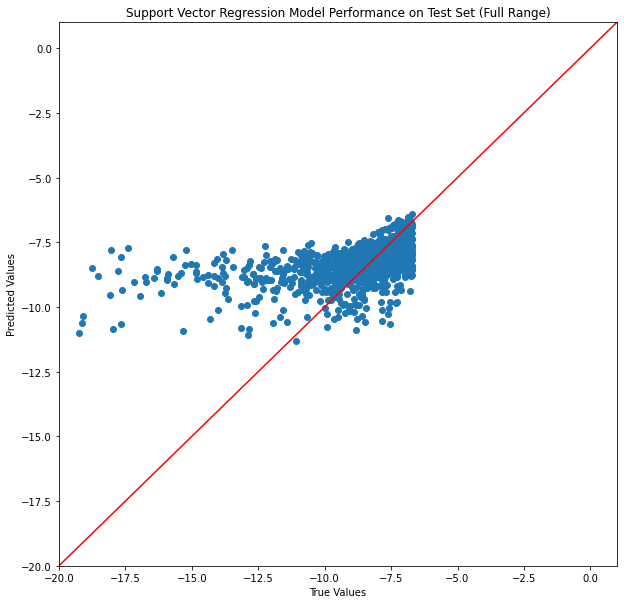

"importance = results.importances_mean\nfor i,v in enumerate(importance):\n    print('Feature: %0d, Score: %.5f' % (i,v))\n# plot feature importance\nplt.bar([x for x in range(len(importance))], importance)\nplt.show()"

In [95]:
regr = make_pipeline(StandardScaler(), SVR(C=0.5, epsilon=0.1)) #scaling is necessary!

#upping epsilon makes the model predict the mean but lowers the RMSE

#regr =SVR(C=1.0, epsilon=0.2)

regr.fit(x_train, np.ravel(y_train))

y_pred = regr.predict(x_test)
#print(y_pred)
#compare = [[y_test[i][0], y_pred[i][0]] for i in range(len(y_test))]
#print(compare)
rmse = np.sqrt(np.mean(((y_pred)-(y_test))**2))
print(rmse)
print(y_pred.shape, y_test[:,0].shape)
print(np.corrcoef(y_pred, y_test[:,0]))

low = -20
high = 1
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(low, high),np.linspace(low,high), c='r')
plt.title('Support Vector Regression Model Performance on Test Set (Full Range)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([low, high])
plt.ylim([low, high])

plt.show()

# feature importances
#results = permutation_importance(regr, x_train, y_train, scoring='neg_mean_squared_error')
"""importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()"""

## SVR with pared down feature set
got rid of TLML_12z, Td_12Z_700mb, T_12Z_700mb, ESATLML_12Z, E_700mb, QV_12Z_700mb

In [13]:
features = fires[['Lat Fire', 'Lon Fire','Number of VIIRS points','QLML_12Z','SPEEDLML_12Z', 'PS_12Z','ELML_12Z','HDWLML','Td_12Z_700mb','HAINES','years','months','days']]
labels = np.log10(fires[['biomass_12Z']].values)
print(labels)

# do the train test split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3)

[[ -9.11761909]
 [ -9.01377171]
 [ -9.17919608]
 [ -9.44225401]
 [ -8.4405293 ]
 [ -7.25842931]
 [ -9.00799732]
 [ -9.32446327]
 [ -7.68541636]
 [ -8.23540664]
 [ -8.64257969]
 [ -9.15496383]
 [ -9.59590327]
 [-10.62265502]
 [-11.88546212]
 [ -8.66103133]
 [ -8.21998308]
 [ -8.1109407 ]
 [ -7.94835234]
 [ -9.07236211]
 [-12.29040124]
 [ -9.62953699]
 [ -9.08754269]
 [-10.77531285]
 [ -8.92508883]
 [ -6.86120328]
 [ -8.8929286 ]
 [-11.36638742]
 [ -9.20167249]
 [ -8.21814903]
 [ -9.07500181]
 [ -8.77068431]
 [ -7.96691124]
 [-10.90108446]
 [-13.46021018]
 [ -7.28947688]
 [ -7.9262695 ]
 [ -8.04748072]
 [ -6.93842165]
 [ -7.40672444]
 [ -6.79344392]
 [ -7.06002894]
 [ -8.8122233 ]
 [ -6.88968035]
 [ -8.89662493]
 [ -8.95164927]
 [ -7.61228436]
 [ -7.69862985]
 [ -8.61446358]
 [ -7.39862149]
 [ -7.11923816]
 [ -8.10918773]
 [ -7.18723155]
 [ -7.94510223]
 [ -9.23728237]
 [ -7.97397244]
 [ -7.29878796]
 [ -8.48637446]
 [ -6.91043484]
 [ -9.28809379]
 [ -7.60003834]
 [ -8.45735215]
 [ -9.76

6.076473797102182e-08
[[1.        0.5253949]
 [0.5253949 1.       ]]


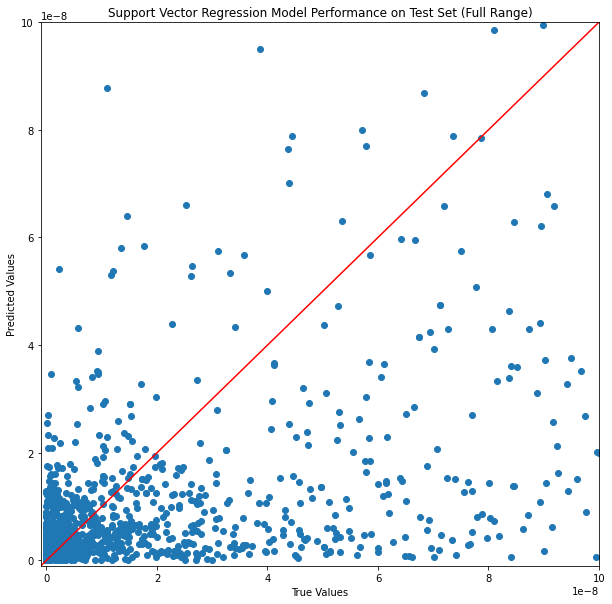

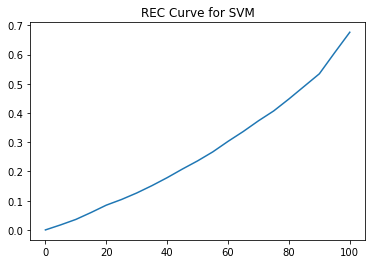

In [15]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) #scaling is necessary!

#regr =SVR(C=1.0, epsilon=0.2)

regr.fit(x_train, np.ravel(y_train))

y_pred = regr.predict(x_test)
#print(y_pred)
#compare = [[y_test[i][0], y_pred[i][0]] for i in range(len(y_test))]
#print(compare)
rmse = np.sqrt(np.mean(((10**y_pred)-(10**y_test))**2))
print(rmse)
print(np.corrcoef(10**y_pred, 10**y_test[:,0]))

low = -1e-9
high = 1e-7
plt.figure(figsize=(10,10))
plt.scatter(10**y_test, 10**y_pred)
plt.plot(np.linspace(low, high),np.linspace(low,high), c='r')
plt.title('Support Vector Regression Model Performance on Test Set (Full Range)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([low, high])
plt.ylim([low, high])

plt.show()

# plot REC curve
thresholds, accuracy = REC(10**y_pred, 10**y_test[:,0])

plt.plot(thresholds, accuracy)
plt.title('REC Curve for SVM')
plt.show()

## Other methods (fill in later)

1.6707808542084677


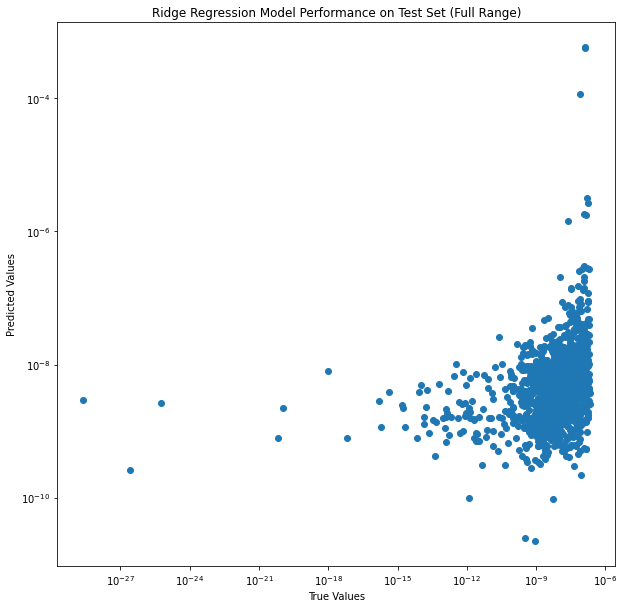

In [94]:
reg = Ridge().fit(x_train, y_train)
y_pred = reg.predict(x_test)
y_test = y_test
compare = [[y_test[i][0], y_pred[i][0]] for i in range(len(y_test))]
#print(compare)
rmse = np.sqrt(np.mean((y_pred-y_test)**2))
print(rmse)

plt.figure(figsize=(10,10))
plt.scatter(10**y_test, 10**y_pred)
plt.title('Ridge Regression Model Performance on Test Set (Full Range)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.xscale('log')
plt.yscale('log')

plt.show()

/home/lthapa/anaconda3/envs/ML_py/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
/home/lthapa/anaconda3/envs/ML_py/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


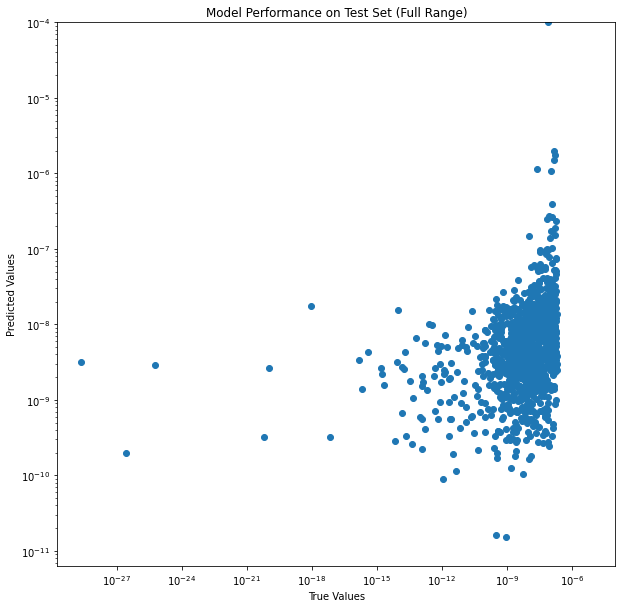

/home/lthapa/anaconda3/envs/ML_py/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/lthapa/anaconda3/envs/ML_py/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


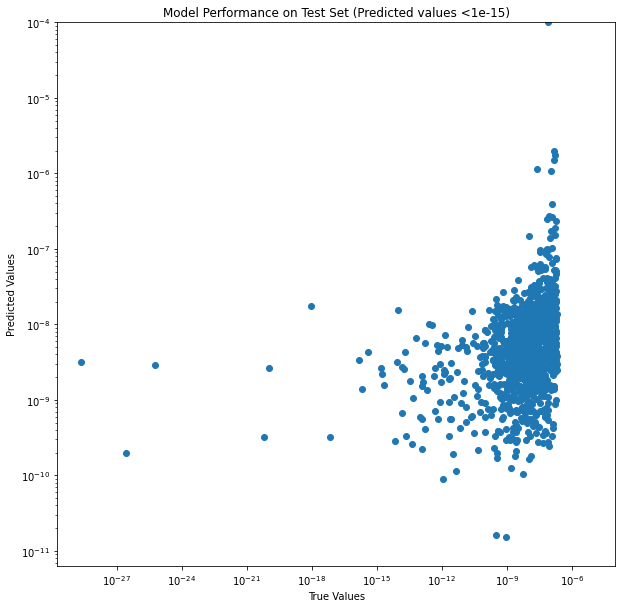

In [86]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
y_test = y_test
compare = [[y_test[i][0], y_pred[i][0]] for i in range(len(y_test))]
#print(compare)
rmse = np.sqrt(np.mean((y_pred-y_test)**2))
print(rmse)

plt.figure(figsize=(10,10))
plt.scatter(10**y_test, 10**y_pred)
plt.title('Model Performance on Test Set (Full Range)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.xscale('log')
plt.yscale('log')
plt.xlim([-.1e-7,1e-4])
plt.ylim([-.1e-7,1e-4])
plt.show()